In [2]:
!pip install opendatasets

In [4]:
import opendatasets as od
dataset_url = 'https://www.kaggle.com/datasets/bhaveshmittal/celebrity-face-recognition-dataset'
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: akashbhambal
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/bhaveshmittal/celebrity-face-recognition-dataset


In [5]:
# Step 3: Imports
import os
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split

# Step 4: Define paths
data_dir = 'celebrity-face-recognition-dataset'

# Step 5: Image transformations
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])
])

# Step 6: Load dataset
full_dataset = datasets.ImageFolder(root=data_dir, transform=transform)

# Optional: Check class names
print("Classes:", full_dataset.classes)

# Step 7: Split into train and validation
train_size = int(0.8 * len(full_dataset))
val_size = len(full_dataset) - train_size
train_dataset, val_dataset = random_split(full_dataset, [train_size, val_size])

# Step 8: Create dataloaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)


Classes: ['Angelina Jolie', 'Brad Pitt', 'Denzel Washington', 'Hugh Jackman', 'Jennifer Lawrence', 'Johnny Depp', 'Kate Winslet', 'Leonardo DiCaprio', 'Megan Fox', 'Natalie Portman', 'Nicole Kidman', 'Robert Downey Jr', 'Sandra Bullock', 'Scarlett Johansson', 'Tom Cruise', 'Tom Hanks', 'Will Smith']


In [6]:
train_loader, val_loader

(<torch.utils.data.dataloader.DataLoader at 0x790b2767e6d0>,
 <torch.utils.data.dataloader.DataLoader at 0x790b1ece0790>)

## Data Visualization

Subfolders: ['Will Smith', 'Nicole Kidman', 'Robert Downey Jr', 'Kate Winslet', 'Jennifer Lawrence', 'Hugh Jackman', 'Denzel Washington', 'Angelina Jolie', 'Tom Hanks', 'Megan Fox', 'Leonardo DiCaprio', 'Johnny Depp', 'Scarlett Johansson', 'Natalie Portman', 'Tom Cruise', 'Sandra Bullock', 'Brad Pitt']


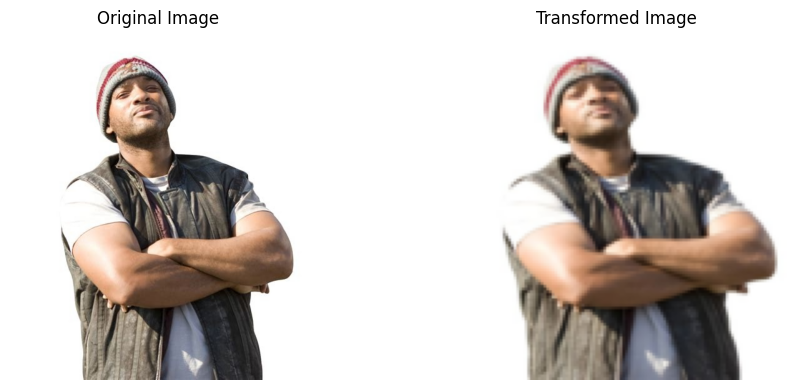

In [8]:
import matplotlib.pyplot as plt
import torchvision.transforms.functional as F
from PIL import Image
import os

# Inspect subfolders
data_dir = "celebrity-face-recognition-dataset"
subfolders = os.listdir(data_dir)
print("Subfolders:", subfolders)

# Adjust if there's only one subfolder (e.g. "celebrity_faces")
if len(subfolders) == 1 and os.path.isdir(os.path.join(data_dir, subfolders[0])):
    data_dir = os.path.join(data_dir, subfolders[0])

# Choose a sample image from a class
class_folder = os.path.join(data_dir, os.listdir(data_dir)[0])
sample_image = os.path.join(class_folder, os.listdir(class_folder)[0])

# Load the image
original_image = Image.open(sample_image).convert("RGB")

# Apply your transform
transformed_image = transform(original_image)

# Denormalize for display
def denormalize(tensor):
    return tensor * 0.5 + 0.5

# Plot original and transformed
plt.figure(figsize=(10, 4))

# Original
plt.subplot(1, 2, 1)
plt.imshow(original_image)
plt.title("Original Image")
plt.axis('off')

# Transformed
plt.subplot(1, 2, 2)
plt.imshow(denormalize(transformed_image).permute(1, 2, 0))  # CHW to HWC
plt.title("Transformed Image")
plt.axis('off')

plt.tight_layout()
plt.show()
